In [1]:
#IMPORT DAS BIBLIOTECAS NECESSÁRIAS
import numpy as np #PARA DEFINIR OS PONTOS DE OBSERVAÇÕES 
from GeneticAlgorithm import GeneticAlgorithm as GA #IMPORTAR A CLASSE ALGORITMO GENETICO
import matplotlib.pyplot as plt #PARA VISUALIZAR O RESULTADO
from Models import rect #IMPORTANDO O MODELO
from Data.Functionals import phi #IMPORTANDO A FUNCAO DE AJUSTE
from Data.Population import Fontes #PRA CRIAR A POPULACAO USANDO O MELHOR DEPOIS DO GENETICO

In [36]:
#DEFINICAO DOS PARAMETROS PRO GENETICO
xobs = np.linspace(-1000,1000,500) #SO PRA CALCULAR O GZ DO MELHOR INDIVIDUO DEPOIS DO GENETICO
zobs = np.zeros( len( xobs ) ) #SO PRA CALCULAR O GZ DO MELHOR INDIVIDUO DEPOIS DO GENETICO

# dimensoes do dique vertical:
xmin = -100.
xmax = +100.
zmin = 200.0
zmax = 800.0
rho = 2.95

rec1 = rect( -300, -100, 50, 150, 2 )
rec2 = rect( -200, 0, 150, 250, 2 )
rec3 = rect( -100, 100, 250, 350, 2 )
rec4 = rect( 0, 200, 350, 450, 2 )

models = [ rec1, rec2, rec3, rec4 ]
gz1 = rec1.Gz( xobs, zobs )
gz1 = rec1.addnoise( )

gz2 = rec2.Gz( xobs, zobs )
gz2 = rec2.addnoise( )

gz3 = rec3.Gz( xobs, zobs )
gz3 = rec3.addnoise( )

gz4 = rec4.Gz( xobs, zobs )
gz4 = rec4.addnoise( )


model_gz = gz1 + gz2 + gz3 + gz4 


min_bounds = [ -1000, 50, 1e3 ] #ONDE PROCURAR AS SOLUCOES
max_bounds = [ +1000, 1000, 1e12 ] #ONDE PROCURAR AS SOLUCOES
nfontes = 20 #NUMERO DE BOLINHAS DE CADA INDIVIDUO
nind = 50 #NUMERO DE INDIVIDUOS
pmut = 0.1 #PROBABILIDADE DE CADA INDIVIDUO MUTAR
mu = 0.0009 #FATOR DE REGULARIZACAO
ngera = 5000 #NUMERO DE GERACOES

In [37]:
#ALGORITMO GENETICO
ga = GA( phi, [ model_gz, 'L2', mu ], min_bounds, max_bounds, pmut, nfontes, nind) #CRIANDO O AG USANDO OS PARAMETROS ESCOLHIDOS
ga.Initialize()
ga.FirstFit()
pop = Fontes( ) #CRIANDO UMA NOVA POPULACAO PRA GUARDAR O MELHOR DO GENETICO
melhor_primeira = pop.Gera_from_Existing( [ ga.winner ] ) #GUARDANDO O MELHOR DO GENETICO NESSA NOVA POPULACAO(QUE É UMA CLASSE) ( O MELHOR DO GENETICO TEM O NOME DE ga.winner)
gz_best_primeira = 0 #INICIALIZANDO O GZ DO MELHOR
for b in melhor_primeira: #O MELHOR É UM DICIONARIO, ONDE CADA CHAVE( OBJETO SPHERE ) GUARDA AS PROPIEDADES DESSA SPHERE( X, Y, M)
    for i in b: #AQUI PEGAMOS APENAS AS CHAVES( SPHERES )
        gz_best_primeira += i.Gz(xobs, zobs) #CALCULAMOS O GZ DE TODAS AS SPHERES


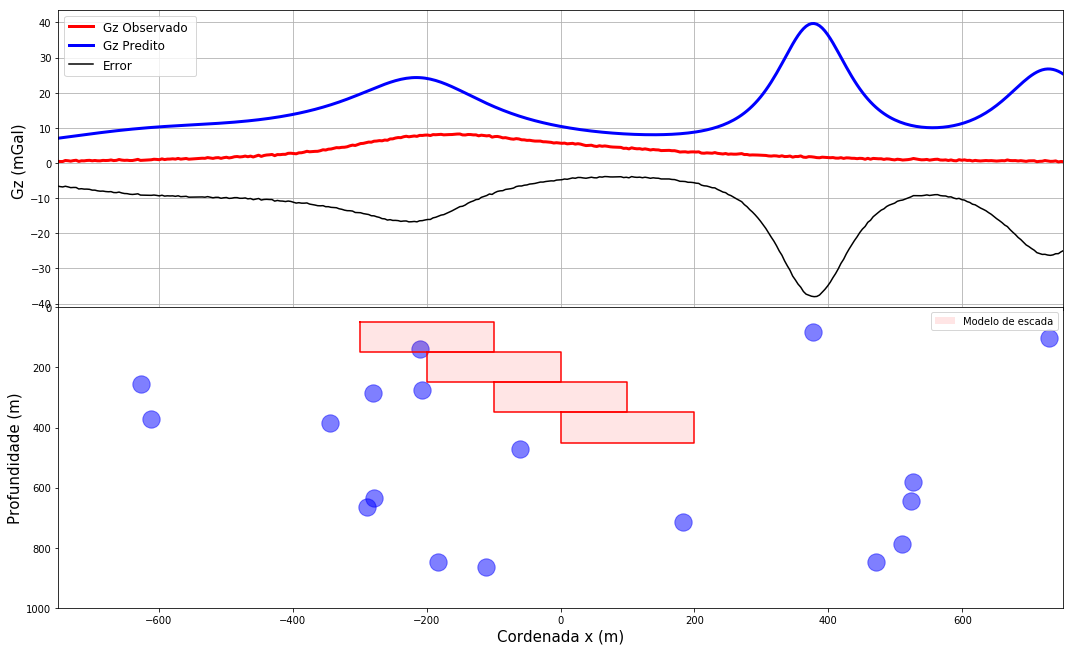

In [38]:
#PLOTANDO A O MODELO, AS BOLINHAS E AS CURVAS
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 11), facecolor='w', sharex=True, gridspec_kw={'hspace': -0.01})

error = (model_gz - gz_best_primeira)

ax1.plot(xobs, model_gz, 'r-', label='Gz Observado ', linewidth=3)
ax1.plot(xobs, gz_best_primeira, 'b-', label='Gz Predito ', linewidth=3)
ax1.plot(xobs, error, 'k-', label='Error')
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.set_xlim(-750, 750)
ax1.grid()
ax1.label_outer()
ax2.scatter(ga.winner[:, 0], ga.winner[:, 1], c='blue', s=300.0, alpha=0.5)

#ax2.scatter(xobs[0:-1:5], zobs[0:-1:5] + 10, s=20, c='green')

for index,model in enumerate( models ):
    ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
             [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], "-r")
    
    if index == 0:
        ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                     [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], alpha = 0.1, facecolor = 'red',\
                     label='Modelo de escada')
    else:
        ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                     [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], alpha = 0.1, facecolor = 'red')

ax2.legend( )
ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(0, 1000)
ax2.set_xlabel('Cordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

In [39]:
ga.start( ngera ) #COMECANDO AS ITERACOES (NESTE CASO, ngera)

pop = Fontes( ) #CRIANDO UMA NOVA POPULACAO PRA GUARDAR O MELHOR DO GENETICO
best = pop.Gera_from_Existing( [ ga.winner ] ) #GUARDANDO O MELHOR DO GENETICO NESSA NOVA POPULACAO(QUE É UMA CLASSE) ( O MELHOR DO GENETICO TEM O NOME DE ga.winner)
gz_best = 0 #INICIALIZANDO O GZ DO MELHOR
for b in best: #O MELHOR É UM DICIONARIO, ONDE CADA CHAVE( OBJETO SPHERE ) GUARDA AS PROPIEDADES DESSA SPHERE( X, Y, M)
    for i in b: #AQUI PEGAMOS APENAS AS CHAVES( SPHERES )
        gz_best += i.Gz(xobs, zobs) #CALCULAMOS O GZ DE TODAS AS SPHERES

thetas = ga.bests_theta #GUARDANDO A LISTA DOS THETAS (REGULARIZACAO = THETA)

Geração 0
Geração 1
Geração 2
Geração 3
Geração 4
Geração 5
Geração 6
Geração 7
Geração 8
Geração 9
Geração 10
Geração 11
Geração 12
Geração 13
Geração 14
Geração 15
Geração 16
Geração 17
Geração 18
Geração 19
Geração 20
Geração 21
Geração 22
Geração 23
Geração 24
59.86717299806508
Geração 25
Geração 26
Geração 27
Geração 28
Geração 29
Geração 30
Geração 31
Geração 32
Geração 33
26.325832921503988
Geração 34
Geração 35
Geração 36
Geração 37
Geração 38
Geração 39
Geração 40
Geração 41
Geração 42
Geração 43
Geração 44
Geração 45
Geração 46
Geração 47
Geração 48
Geração 49
Geração 50
Geração 51
Geração 52
Geração 53
Geração 54
Geração 55
Geração 56
Geração 57
Geração 58
Geração 59
Geração 60
Geração 61
Geração 62
Geração 63
Geração 64
Geração 65
Geração 66
Geração 67
Geração 68
Geração 69
Geração 70
Geração 71
Geração 72
Geração 73
Geração 74
Geração 75
Geração 76
Geração 77
Geração 78
Geração 79
Geração 80
Geração 81
Geração 82
Geração 83
Geração 84
Geração 85
25.267961283799455
Geração 

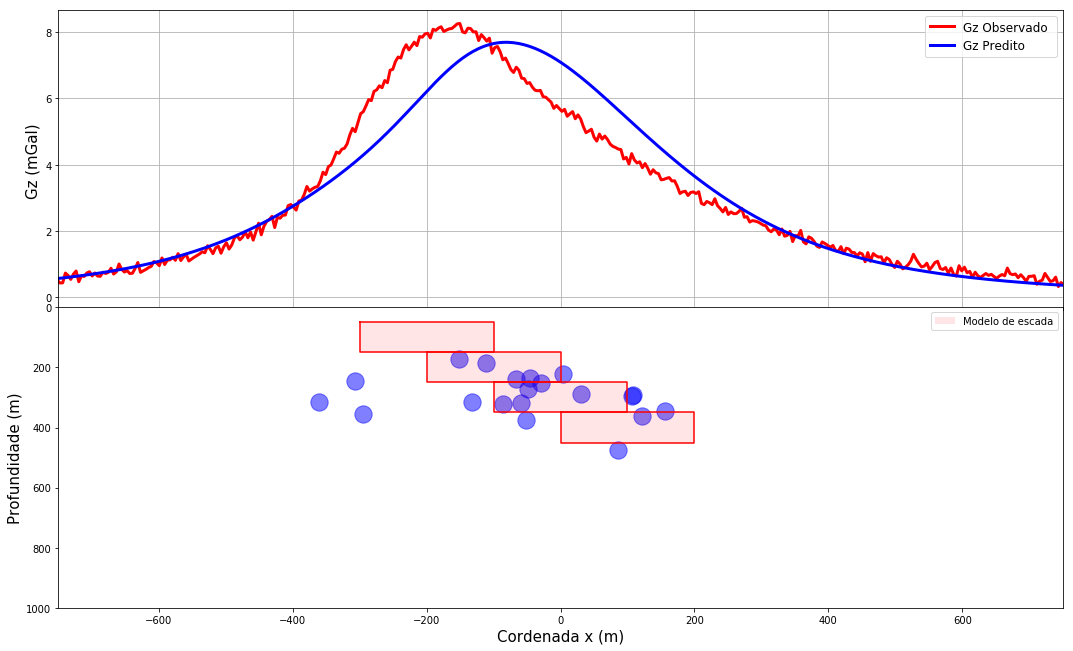

In [40]:
#PLOTANDO A O MODELO, AS BOLINHAS E AS CURVAS
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 11), facecolor='w', sharex=True, gridspec_kw={'hspace': -0.01})

error = np.std(model_gz - gz_best)

ax1.plot(xobs, model_gz, 'r-', label='Gz Observado ', linewidth=3)
ax1.plot(xobs, gz_best, 'b-', label='Gz Predito ', linewidth=3)
ax1.legend(fontsize=12)
ax1.set_ylabel('Gz (mGal)', fontsize=15)
ax1.set_xlim(-750, 750)
ax1.grid()
ax1.label_outer()
ax2.scatter(ga.winner[:, 0], ga.winner[:, 1], c='blue', s=300.0, alpha=0.5)

#ax2.scatter(xobs[0:-1:5], zobs[0:-1:5] + 10, s=20, c='green')

for index,model in enumerate( models ):
    ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
             [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], "-r")
    
    if index == 0:
        ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                     [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], alpha = 0.1, facecolor = 'red',\
                     label='Modelo de escada')
    else:
        ax2.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                     [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], alpha = 0.1, facecolor = 'red')

ax2.legend( )
ax2.set_ylabel('Profundidade (m)', fontsize=15)
ax2.set_ylim(0, 1000)
ax2.set_xlabel('Cordenada x (m)', fontsize=15)
ax2.invert_yaxis()
ax2.label_outer()
plt.show( )

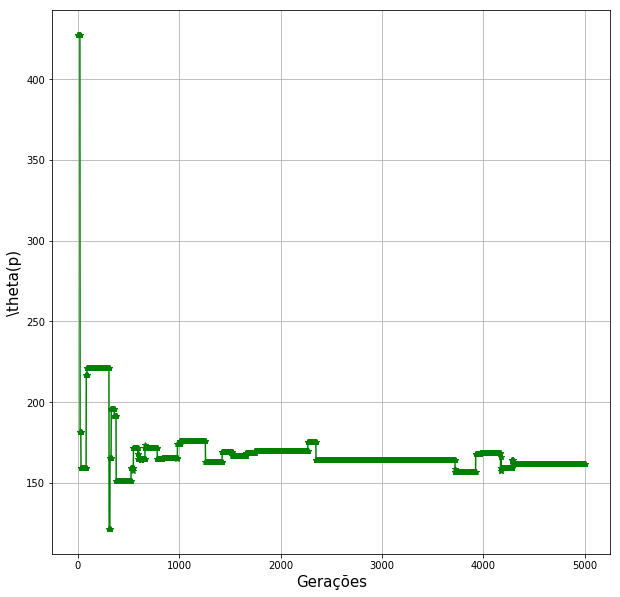

In [41]:
#PLOTANDO A FUNCAO THETA
plt.figure( figsize = ( 10,10 ) )
plt.plot( range( ngera ), thetas, '*-g')
plt.xlabel('Gerações', fontsize=15)
plt.grid()
plt.ylabel(r'\theta(p)', fontsize=15)
plt.show()
